In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data = pd.read_json("train.json/train.json")

In [ ]:
#check balance of categories
data['cuisine'].value_counts()

<BarContainer object of 20 artists>

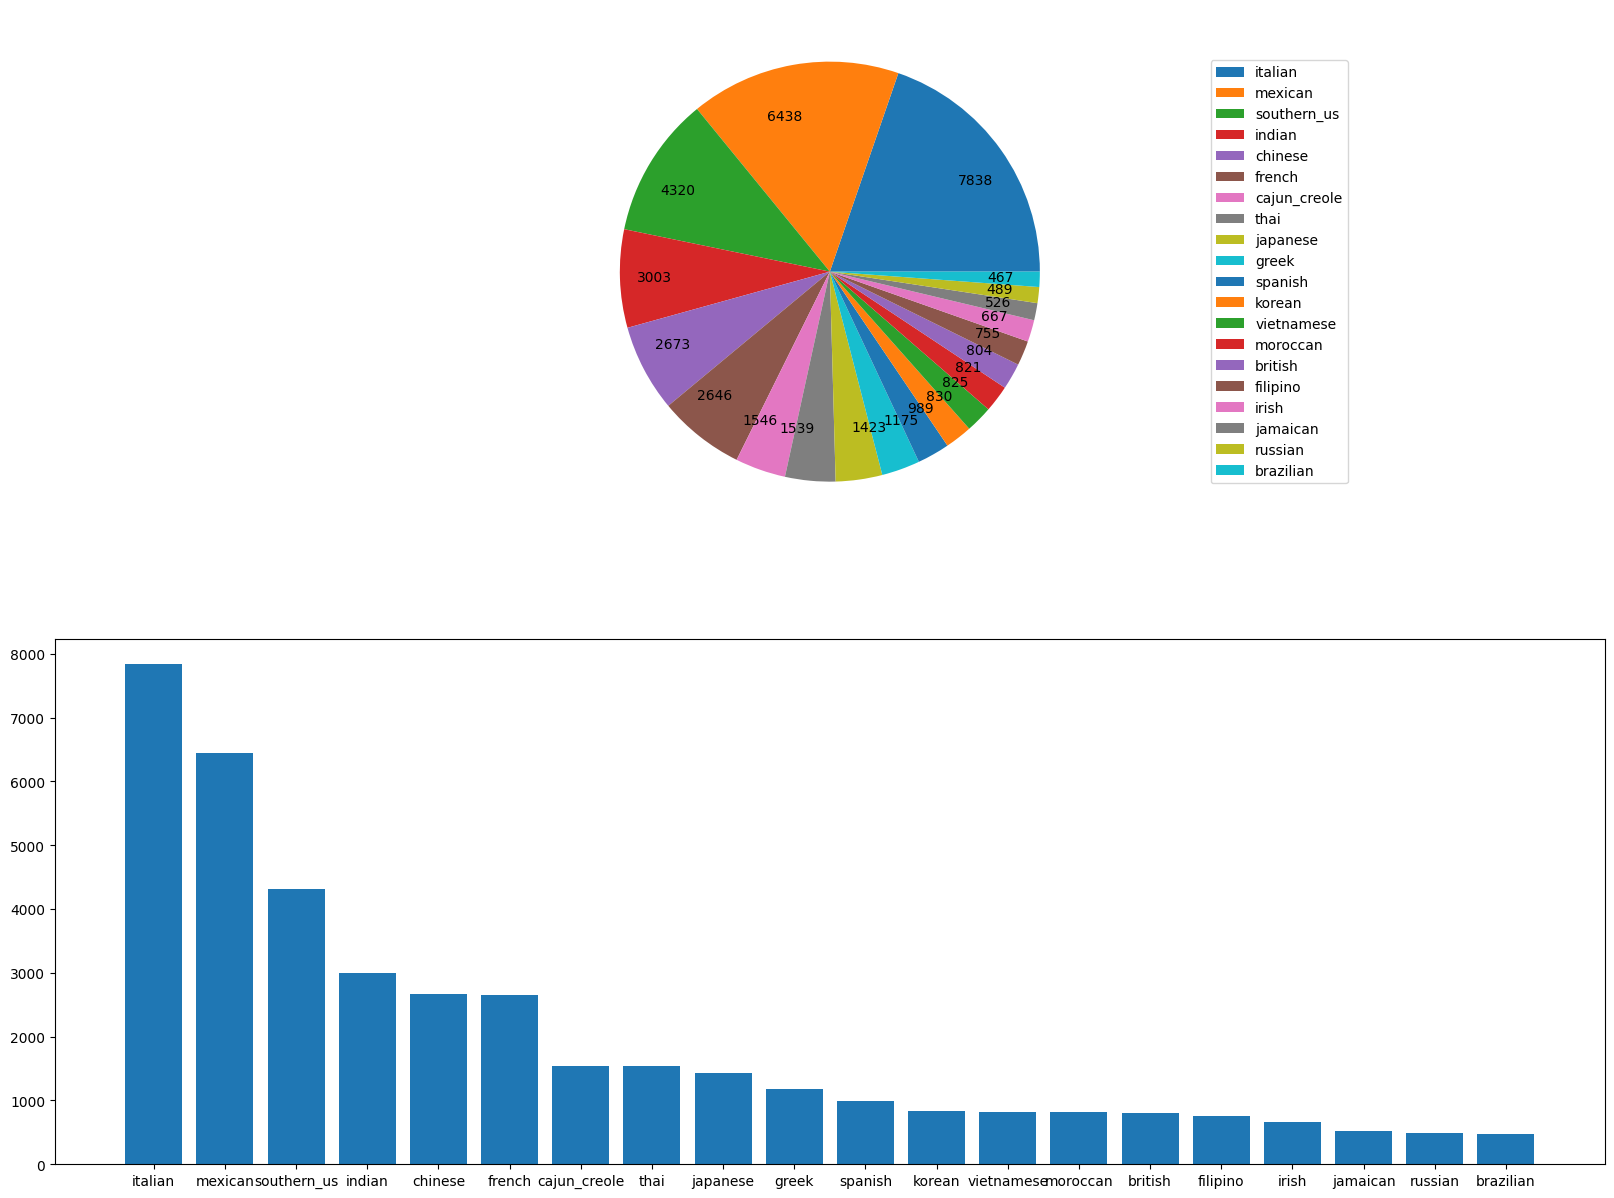

In [56]:
cuisine_counts = data['cuisine'].value_counts()
percentages = [round((i / cuisine_counts.sum())*100, 2) for i in cuisine_counts]
cuisine = {
    "count":cuisine_counts.values,
    "percentage":percentages
}
cuisine_df = pd.DataFrame(cuisine)
fig, ax = plt.subplots(2,1,figsize=(20,15))
ax[0].pie(cuisine_df['percentage'], labels=cuisine['count'], labeldistance=0.75)
ax[0].legend(cuisine_counts.index, loc="right", bbox_to_anchor=(1.5,0.5))
ax[1].bar(cuisine_counts.index,cuisine_counts)

In [ ]:
unique_ingredients = []
for i in data['ingredients']:
    for n in i:
        if n not in unique_ingredients:
            unique_ingredients.append(n)
print(len(unique_ingredients))

In [ ]:
lb = LabelBinarizer()
lb.fit(data['cuisine'])
cuisines = lb.transform(data['cuisine'])
data.drop(columns=['cuisine'], inplace=True)
cuisine_labels = lb.inverse_transform(cuisines)